In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from helpers import read_jsonl, meta_path, texts_path

In [2]:
relevant_papers = {paper["paper_id"] for paper in read_jsonl(texts_path)}

In [3]:
data = []
for entry in read_jsonl(meta_path):
    paper = entry["paper_id"]
    has_text = 1 if paper in relevant_papers else 0
    data.append({"paper_id": paper, "year": entry["year"], "has_text": has_text})

In [4]:
# S2ORC 'Political Science' corpus
metadata = pd.DataFrame(data)
metadata.shape

(4101955, 3)

In [5]:
# count papers
g = (
    metadata
    .loc[metadata["year"].between(1991, 2021)]
    .groupby("year", as_index=False)
    .agg(
        count=("paper_id", "count"), 
        texts_sum=("has_text", "sum"),
        texts_pct=("has_text", "mean")
    )
)
g["pct"] = (g["texts_pct"] * 100).round(2)
g

,year,count,texts_sum,texts_pct,pct
0,1991.0,27410,23,0.000839,0.08
1,1992.0,29859,14,0.000469,0.05
2,1993.0,31306,31,0.000990,0.10
3,1994.0,33505,26,0.000776,0.08
4,1995.0,35418,21,0.000593,0.06
5,1996.0,37528,38,0.001013,0.10
6,1997.0,40526,34,0.000839,0.08
7,1998.0,43371,43,0.000991,0.10
8,1999.0,46700,45,0.000964,0.10
9,2000.0,55711,60,0.001077,0.11


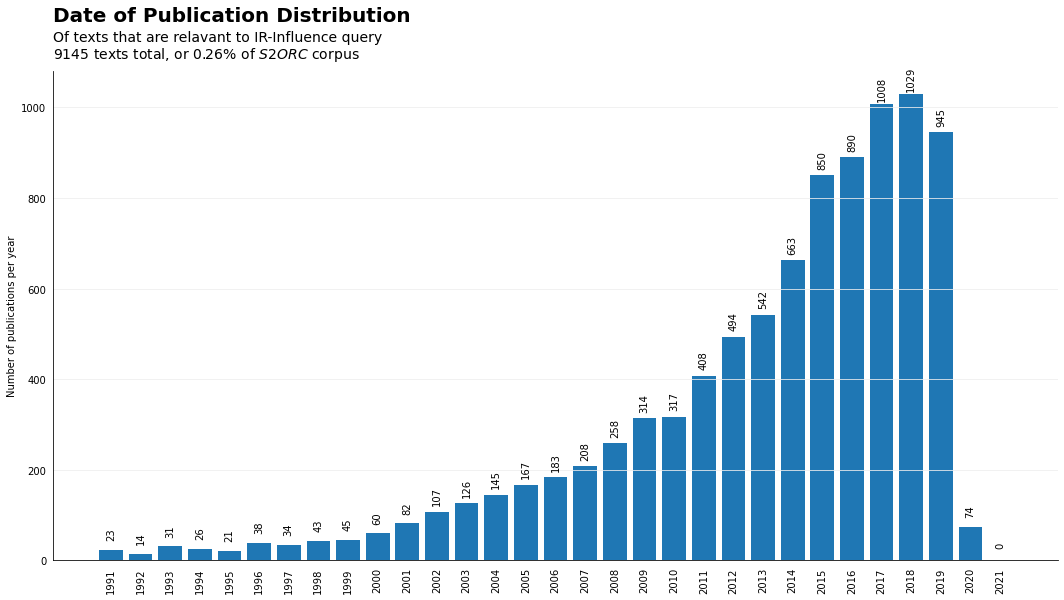

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(18,9))

# removing 1900 outlier
ax.bar(g["year"], g["texts_sum"], label="counts", tick_label=g["year"].astype(int))

for idx in g.index:
    _row = g.loc[idx, :]
    ax.annotate(
        int(_row["texts_sum"]),
        xy=(_row["year"], _row["texts_sum"] + 35),
        ha="center", va="center", rotation=90
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color='#EEEEEE')

plt.ylabel("Number of publications per year")
plt.xticks(rotation=90)

fig.suptitle("Date of Publication Distribution", fontsize=20, fontweight='bold',x=0.125,ha='left')
fig.text(0.125,0.927,f"Of texts that are relavant to IR-Influence query", fontsize=14)
fig.text(0.125,0.9,f"{g['texts_sum'].sum()} texts total, or 0.26% of $S2ORC$ corpus",fontsize=14)
plt.savefig("../figures/210807_date-of-publication-distribution.png", dpi=300, bbox_inches="tight", pad_inches=0.3, transparent=False)
plt.show()